# Analysis for Automobile dataset

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
auto = pd.read_csv("Automobile_data.csv")
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [56]:
auto.dtypes #data types of data set

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [57]:
auto.shape #shape of data set

(205, 26)

In [58]:
#removing null values
df_data = auto.replace('?',np.NAN) 
df_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [59]:
#Fill missing data of normalised-losses, price, horsepower, peak-rpm, bore, stroke with the respective column mean
df_temp = auto[auto['normalized-losses']!='?']
normalised_mean = df_temp['normalized-losses'].astype(int).mean()
auto['normalized-losses'] = auto['normalized-losses'].replace('?',normalised_mean).astype(int)

df_temp = auto[auto['price']!='?']
normalised_mean = df_temp['price'].astype(int).mean()
auto['price'] = auto['price'].replace('?',normalised_mean).astype(int)

df_temp = auto[auto['horsepower']!='?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
auto['horsepower'] = auto['horsepower'].replace('?',normalised_mean).astype(int)

df_temp = auto[auto['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
auto['peak-rpm'] = auto['peak-rpm'].replace('?',normalised_mean).astype(int)

df_temp = auto[auto['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
auto['bore'] = auto['bore'].replace('?',normalised_mean).astype(float)

df_temp = auto[auto['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
auto['stroke'] = auto['stroke'].replace('?',normalised_mean).astype(float)

auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [60]:
#Fill missing data category Number of doors with the mode of the column i.e. Four
auto['num-of-doors'] = auto['num-of-doors'].replace('?','four')
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [61]:
auto.describe() #Summary Statistics of the dataset

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


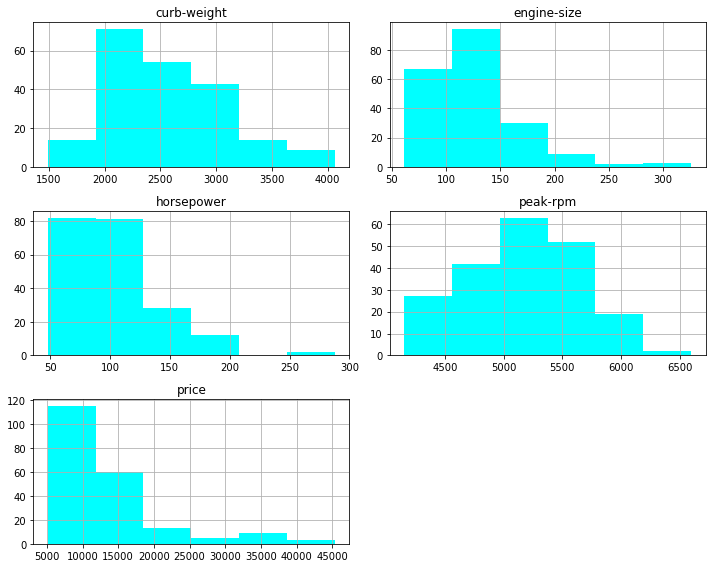

In [62]:
# Univariate Analysis
auto[['curb-weight','engine-size','horsepower','peak-rpm','price']].hist(figsize=(10,8),bins=6,color='cyan')
plt.tight_layout()
plt.show()

### Findings

- Most of the car has a Curb Weight is in range 1900 to 3100
- The Engine Size is inrange 60 to 190
- Most vehicle has horsepower 50 to 125
- Most Vehicle are in price range 5000 to 18000
- Peak rpm is mostly distributed between 4600 to 5700

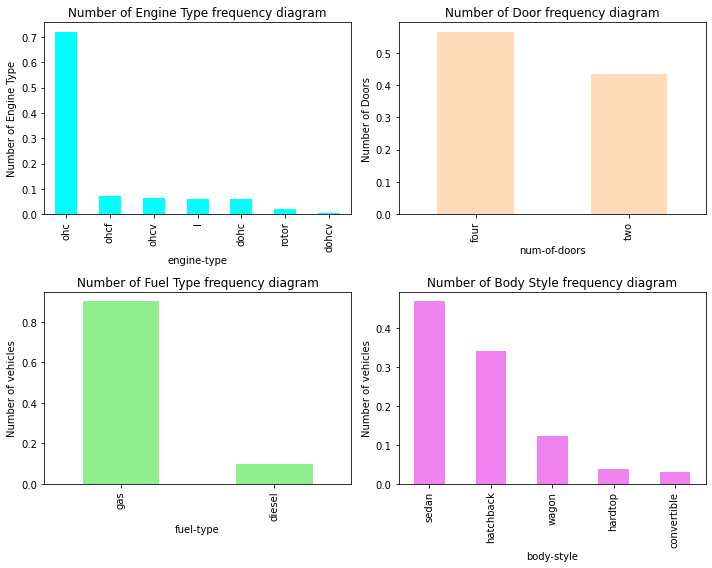

In [63]:
#Value count of respective columns
plt.figure(1)
plt.subplot(221)
auto['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='cyan')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');

plt.subplot(222)
auto['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='peachpuff')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
auto['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='lightgreen')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
auto['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='violet')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

### Findings

- More than 70 % of the vehicle has Ohc type of Engine
- 57% of the cars has 4 doors
- Gas is preferred by 85 % of the vehicles
- Most produced vehicle are of body style sedan around 48% followed by hatchback 32%

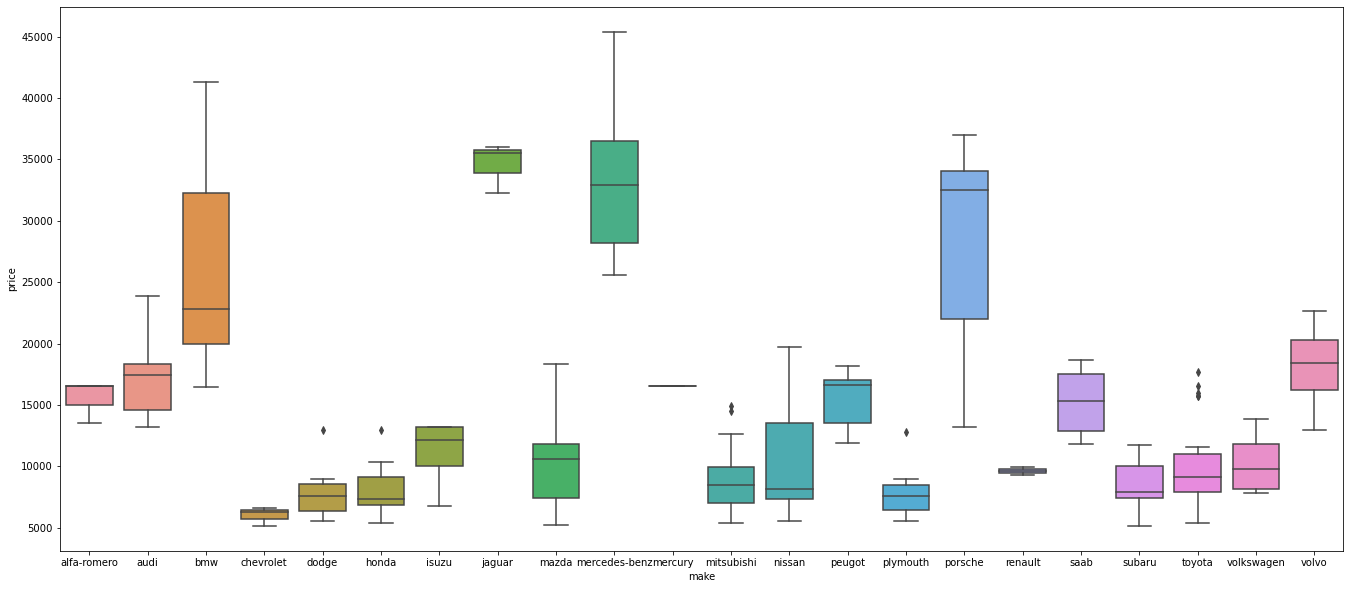

In [64]:
#Bivariate analysis (Price Analysis)
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=auto)

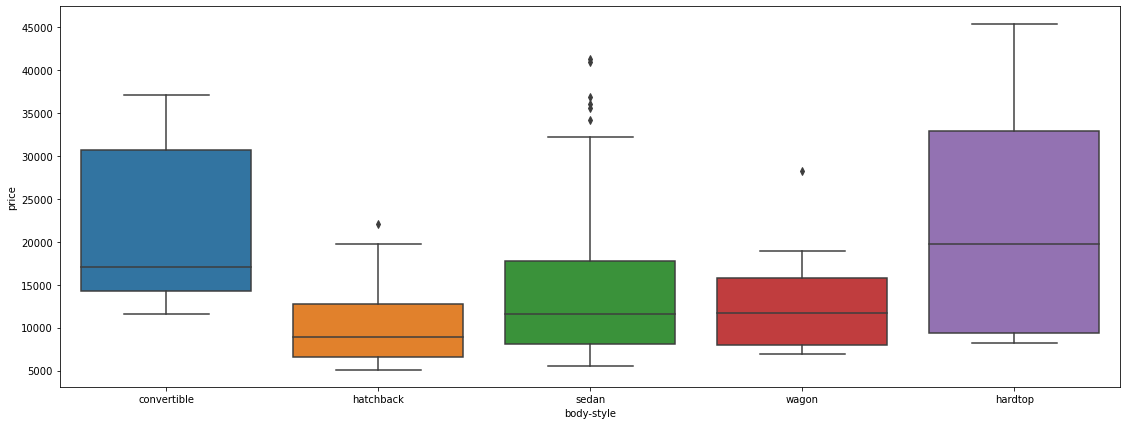

In [65]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="body-style", y="price", data=auto)

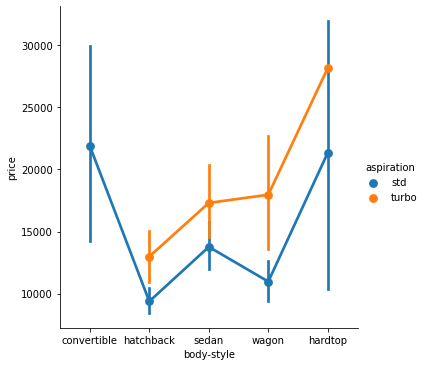

In [66]:
sns.catplot(data=auto, x="body-style", y="price", hue="aspiration" ,kind="point")

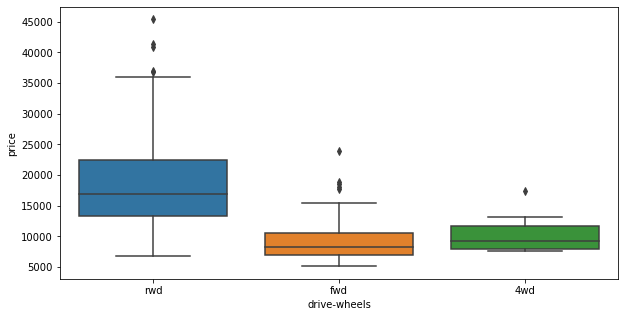

In [67]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=auto)

### Findings

- Mercedez-Benz ,BMW, Jaguar, Porshe produce expensive cars more than 25000
- Chevrolet, Dodge, Honda, Mitsubishi, Nissan, Plymouth, Subaru, Toyata produce budget models with lower prices
- Most of the cars companies produce cars in range below 25000
- Hardtop model are expensive in prices followed by convertible and sedan body style
- Turbo models have higher prices than for the standard model
- Convertible has only standard edition with expensive cars
- Hatchback and Sedan turbo models are available below 20000
- RWD wheel drive vehicles have expensive prices

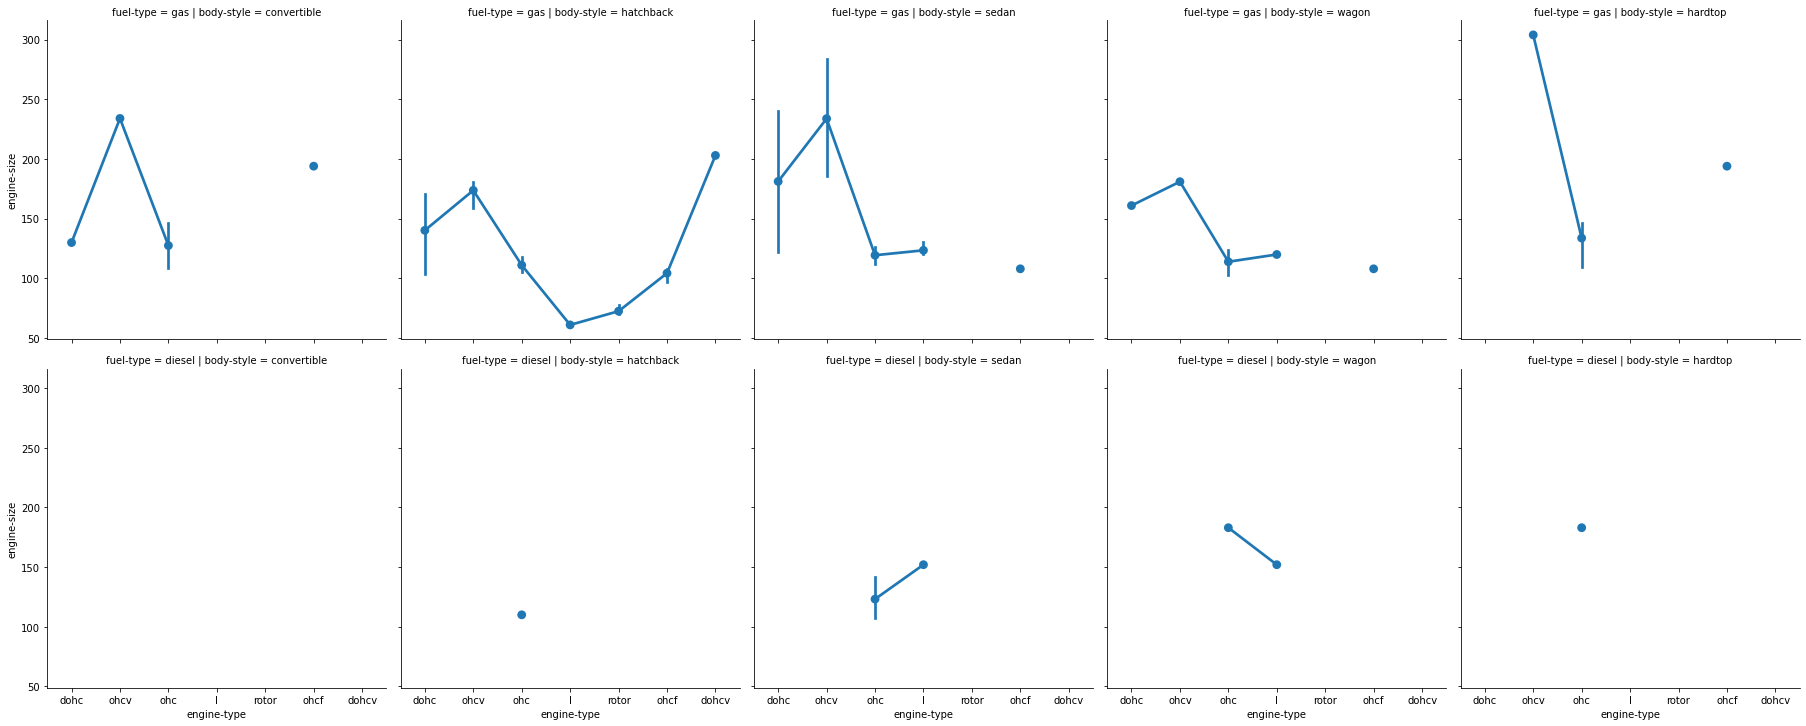

In [68]:
import warnings
warnings.filterwarnings("ignore")
sns.factorplot(data=auto, x="engine-type", y="engine-size", col="body-style",row="fuel-type")

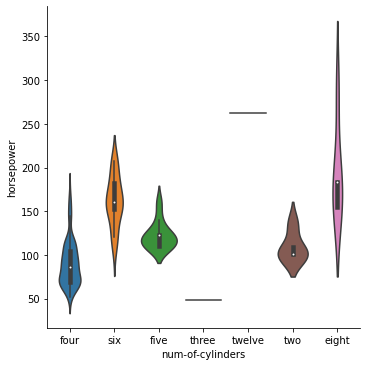

In [69]:
sns.catplot(data=auto, x="num-of-cylinders", y="horsepower",kind="violin")

### Findings

- OHC is the most used Engine Type both for diesel and gas
- Diesel vehicles have Engine type "ohc" and "I" and engine size ranges between 100 to 190
- Engine type OHCV has the bigger Engine size ranging from 155 to 300
- Body-style Hatchback uses max variety of Engine Type followed by sedan
- Body-style Convertible is not available with Diesel Engine type
- Vehicles with above 200 horsepower have Eight Twelve Six cyclinders

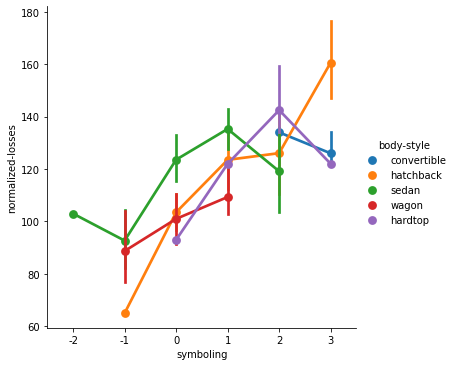

In [70]:
sns.catplot(data=auto, y="normalized-losses", x="symboling" , hue="body-style" ,kind="point")

### Losses Findings

- Increased in risk rating linearly increases in normalised losses in vehicle
- Convertible cars and Hardtop cars have mostly losses with risk rating above 0
- Hatchback cars have highest losses at risk rating 3
- Sedan and Wagon cars have losses even in less risk(safe) rating

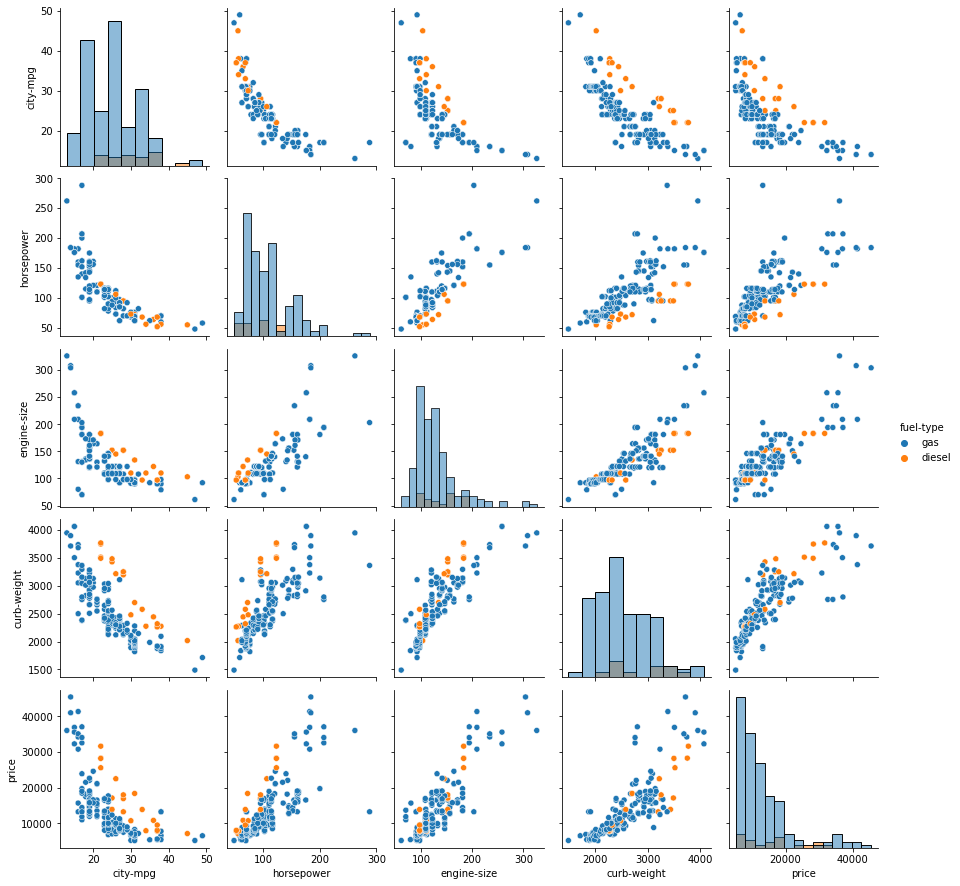

In [71]:
g = sns.pairplot(auto[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

### Findings

- Vehicle Mileage decreases with increase in Horsepower, Engine-size, Curb Weight
- As horsepower increases the engine size increases
- Curb Weight increases with the increase in Engine Size

### Price Analysis

- Engine size and Curb-Weight are positively corelated with Price
- City-mpg is negatively corelated with price as increase in horsepower reduces the mileage